In [1]:
from DataLoader import load_data
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import re
import ast

In [2]:
df = pd.read_csv('train_dataset')
def clean_bbox(bbox_str):
    clean_str = re.sub(r'[^\d,.]', '', bbox_str)
    bbox = tuple(map(float, clean_str.split(',')))
    return bbox

df['bbox'] = df['bbox'].apply(clean_bbox)

masked_images, images, masks, labels = load_data(df)
labels = labels - 1  # This will change labels to 0 and 1

Failed to load image at Dataset-20240319T181738Z-001/Dataset/PineNutsSeedXrays/Pine Nuts/21_HECOC8_PN_P22.png
Failed to load image at Dataset-20240319T181738Z-001/Dataset/PineNutsSeedXrays/Pine Nuts/21_HECOC8_PN_P22.png
Failed to load image at Dataset-20240319T181738Z-001/Dataset/PineNutsSeedXrays/Pine Nuts/21_HECOC8_PN_P22.png
Failed to load image at Dataset-20240319T181738Z-001/Dataset/PineNutsSeedXrays/Pine Nuts/21_HECOC8_PN_P22.png
Failed to load image at Dataset-20240319T181738Z-001/Dataset/PineNutsSeedXrays/Pine Nuts/21_HECOC8_PN_P22.png


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  
)
train_generator = datagen.flow(
    x=masked_images,
    y=labels,
    batch_size=32,
    subset='training'  # Specify this as training data
)

validation_generator = datagen.flow(
    x=masked_images,
    y=labels,
    batch_size=32,
    subset='validation'  # Specify this as validation data
)


In [4]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

# Load ResNet50 pre-trained on ImageNet without the top layer
base_resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Adding custom Layers 
x = base_resnet.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

# Creating the final model 
model_resnet = Model(inputs=base_resnet.input, outputs=predictions)

# Compile model
model_resnet.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


94765736/94765736 [==============================] - 5s 0us/step


In [5]:
# Train ResNet50 with the validation generator
history_resnet = model_resnet.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
)


Epoch 1/10
11/11 [==============================] - 121s 10s/step - loss: 0.6826 - accuracy: 0.8040 - val_loss: 888.5959 - val_accuracy: 0.8864
Epoch 2/10
11/11 [==============================] - 109s 10s/step - loss: 0.4639 - accuracy: 0.8438 - val_loss: 7033.3247 - val_accuracy: 0.8864
Epoch 3/10
11/11 [==============================] - 112s 10s/step - loss: 0.4556 - accuracy: 0.8438 - val_loss: 3669.7180 - val_accuracy: 0.8864
Epoch 4/10
11/11 [==============================] - 111s 10s/step - loss: 0.4525 - accuracy: 0.8438 - val_loss: 620.9987 - val_accuracy: 0.8864
Epoch 5/10
11/11 [==============================] - 102s 9s/step - loss: 0.4427 - accuracy: 0.8438 - val_loss: 87.1054 - val_accuracy: 0.8864
Epoch 6/10
11/11 [==============================] - 101s 9s/step - loss: 0.4490 - accuracy: 0.8438 - val_loss: 25.5949 - val_accuracy: 0.8864
Epoch 7/10
11/11 [==============================] - 100s 9s/step - loss: 0.4368 - accuracy: 0.8438 - val_loss: 9.8037 - val_accuracy: 0.88

In [6]:
from tensorflow.keras.applications import MobileNet

# Load MobileNet pre-trained on ImageNet without the top layer
base_mobilenet = MobileNet(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Adding custom Layers 
x = base_mobilenet.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

# Creating the final model 
model_mobilenet = Model(inputs=base_mobilenet.input, outputs=predictions)

# Compile model
model_mobilenet.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


17225924/17225924 [==============================] - 1s 0us/step


In [7]:
history_mobilenet = model_mobilenet.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
)


Epoch 1/10
11/11 [==============================] - 37s 3s/step - loss: 0.9847 - accuracy: 0.7131 - val_loss: 0.6517 - val_accuracy: 0.8864
Epoch 2/10
11/11 [==============================] - 31s 3s/step - loss: 0.4431 - accuracy: 0.8438 - val_loss: 0.7791 - val_accuracy: 0.8864
Epoch 3/10
11/11 [==============================] - 31s 3s/step - loss: 0.4712 - accuracy: 0.8438 - val_loss: 0.4902 - val_accuracy: 0.8864
Epoch 4/10
11/11 [==============================] - 31s 3s/step - loss: 0.4956 - accuracy: 0.8438 - val_loss: 0.4695 - val_accuracy: 0.8864
Epoch 5/10
11/11 [==============================] - 31s 3s/step - loss: 0.4474 - accuracy: 0.8438 - val_loss: 0.6725 - val_accuracy: 0.8864
Epoch 6/10
11/11 [==============================] - 31s 3s/step - loss: 0.4519 - accuracy: 0.8438 - val_loss: 0.5927 - val_accuracy: 0.8864
Epoch 7/10
11/11 [==============================] - 31s 3s/step - loss: 0.4509 - accuracy: 0.8438 - val_loss: 0.4067 - val_accuracy: 0.8864
Epoch 8/10
11/11 [==

In [8]:
model_mobilenet.save('MobileNetModel')  
model_resnet.save('ResnetModel')

INFO:tensorflow:Assets written to: MobileNetModel\assets


INFO:tensorflow:Assets written to: MobileNetModel\assets


INFO:tensorflow:Assets written to: ResnetModel\assets


INFO:tensorflow:Assets written to: ResnetModel\assets


In [9]:
# For ResNet50
acc_resnet = history_resnet.history['accuracy']
val_acc_resnet = history_resnet.history['val_accuracy']
loss_resnet = history_resnet.history['loss']
val_loss_resnet = history_resnet.history['val_loss']

# For MobileNet
acc_mobilenet = history_mobilenet.history['accuracy']
val_acc_mobilenet = history_mobilenet.history['val_accuracy']
loss_mobilenet = history_mobilenet.history['loss']
val_loss_mobilenet = history_mobilenet.history['val_loss']


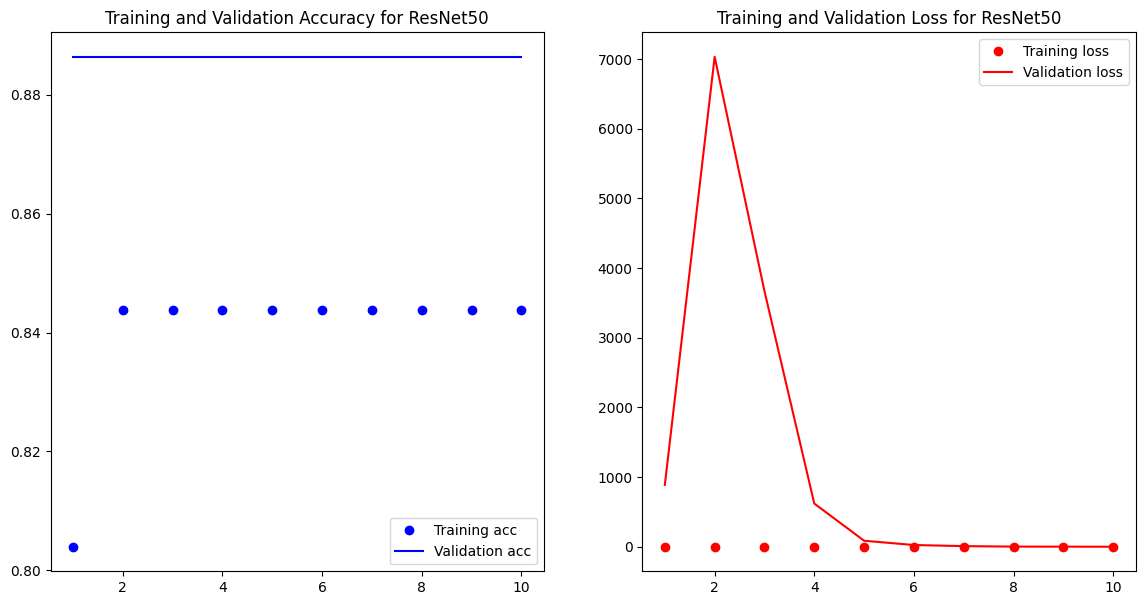

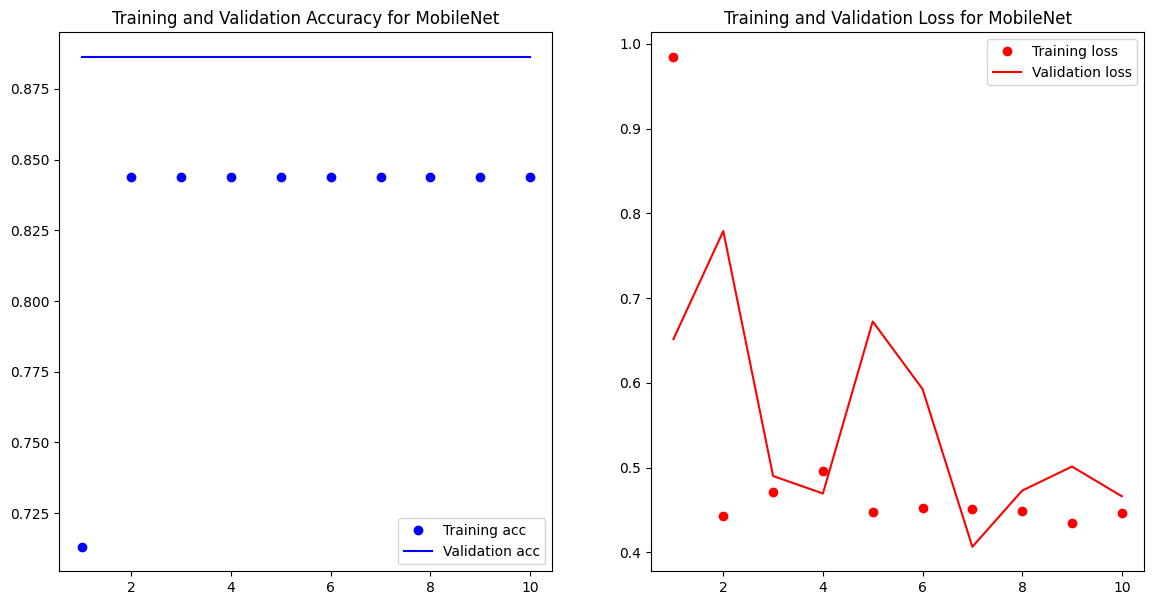

In [10]:
import matplotlib.pyplot as plt

def plot_learning_curves(acc, val_acc, loss, val_loss, title='Model Learning Curve'):
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(14, 7))
    
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and Validation Accuracy for ' + title)
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'ro', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and Validation Loss for ' + title)
    plt.legend()
    
    plt.show()

# Plot learning curves for ResNet50
plot_learning_curves(acc_resnet, val_acc_resnet, loss_resnet, val_loss_resnet, 'ResNet50')

# Plot learning curves for MobileNet
plot_learning_curves(acc_mobilenet, val_acc_mobilenet, loss_mobilenet, val_loss_mobilenet, 'MobileNet')
